In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
df = pd.read_csv("train.csv")

### Data Exploration and Decision

In [7]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S
288,289,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0000,NaN,S
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S
158,159,0,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
786,787,1,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,3101265,7.4958,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   ParCh        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
df.shape

(891, 12)

In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
ParCh            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
ParCh            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


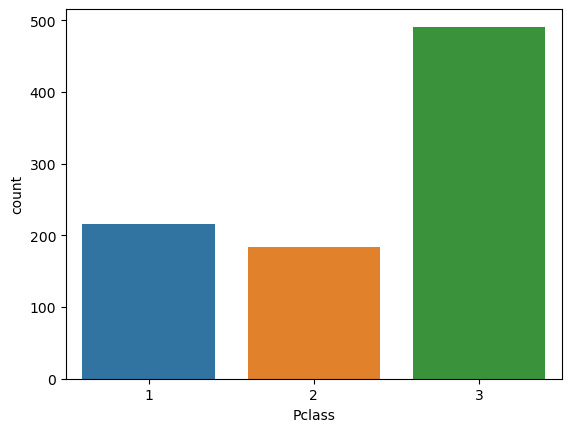

In [31]:
sns.countplot(x="Pclass",data=df)
plt.show()

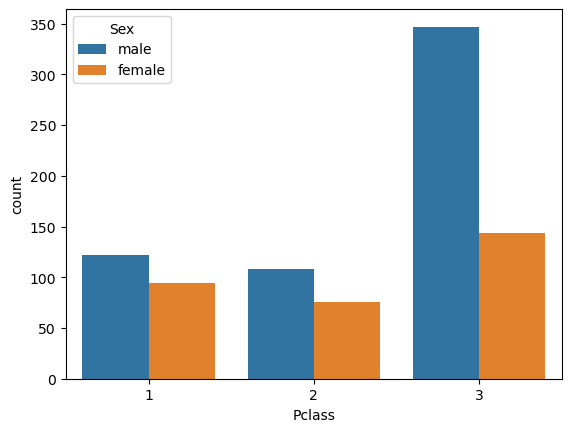

In [34]:
sns.countplot(x="Pclass",hue="Sex",data=df)
plt.show()

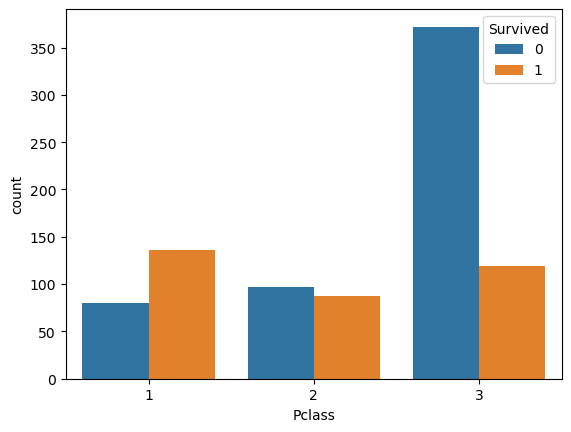

In [15]:
sns.countplot(x="Pclass",hue="Survived",data=df)
plt.show()

In [ ]:
### Passengers in Class 3 has not survived
### more than 50% passengers from class 1 survived

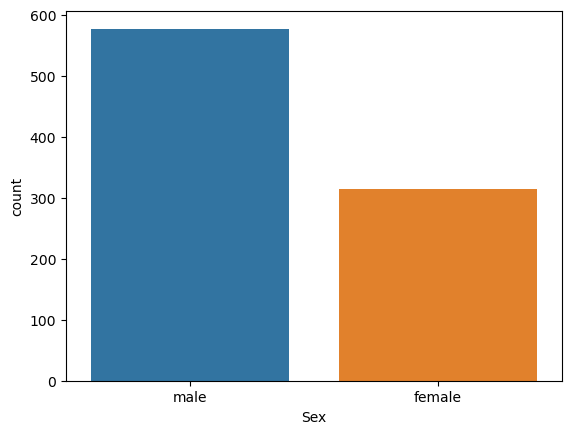

In [32]:
sns.countplot(x="Sex",data=df)
plt.show()

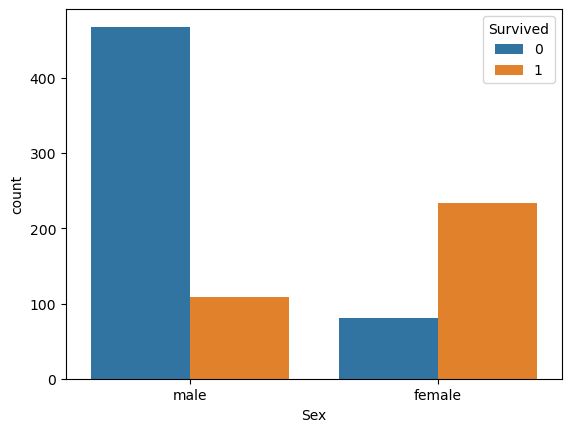

In [16]:
sns.countplot(x="Sex",hue="Survived",data=df)
plt.show()

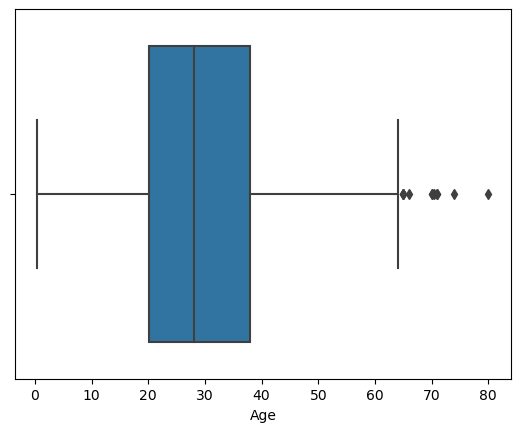

In [38]:
sns.boxplot(x="Age",hue="Pclass",data=df)
plt.show()

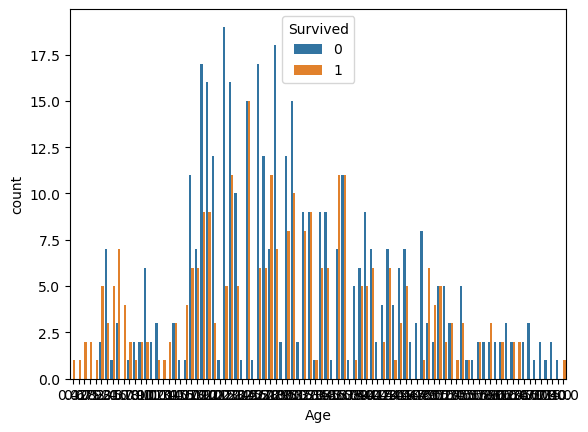

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

In [29]:
sns.countplot(x="Age",hue="Survived",data=df)
plt.show()
plt.figure(figsize=(10,3))

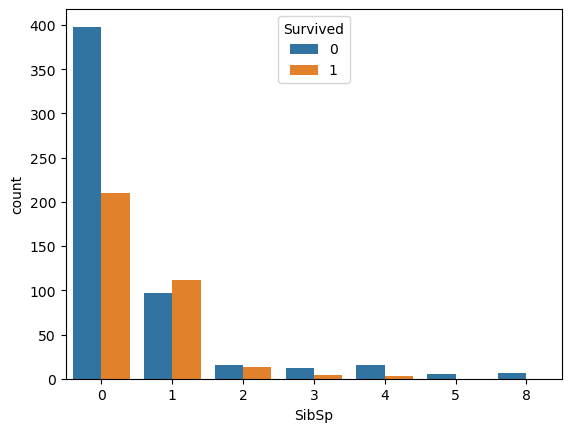

In [18]:
sns.countplot(x="SibSp",hue="Survived",data=df)
plt.show()

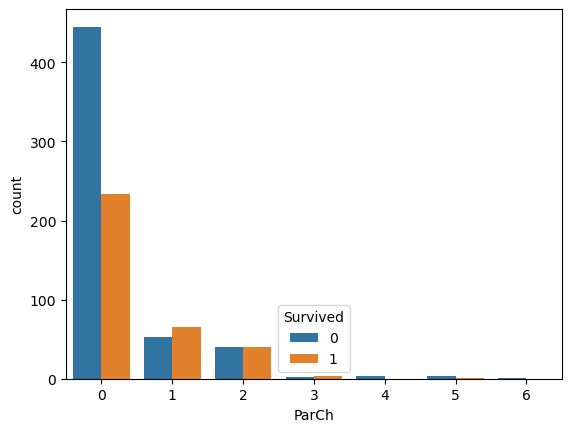

In [19]:
sns.countplot(x="ParCh",hue="Survived",data=df)
plt.show()

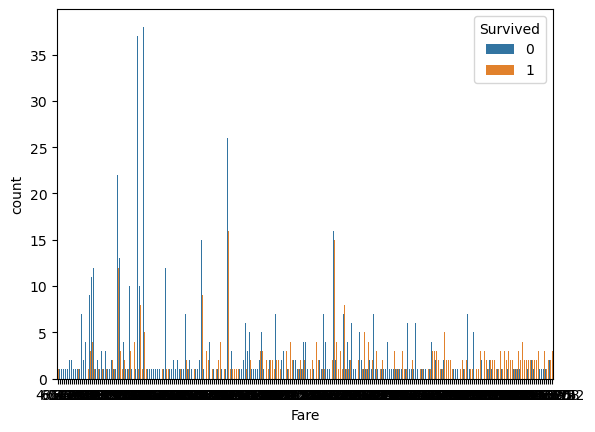

In [20]:
sns.countplot(x="Fare",hue="Survived",data=df)
plt.show()

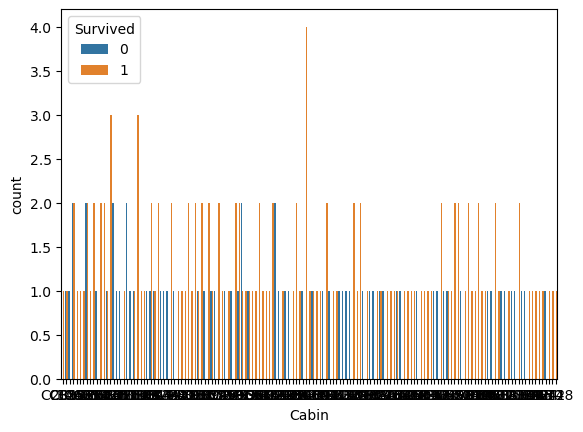

In [21]:
sns.countplot(x="Cabin",hue="Survived",data=df)
plt.show()

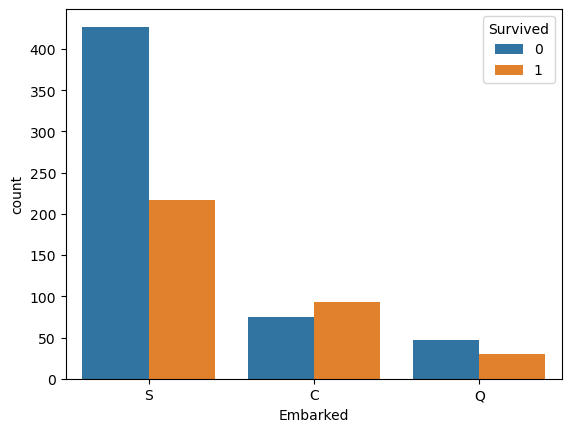

In [22]:
sns.countplot(x="Embarked",hue="Survived",data=df)
plt.show()

In [23]:
corr=df.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,ParCh,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
ParCh,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


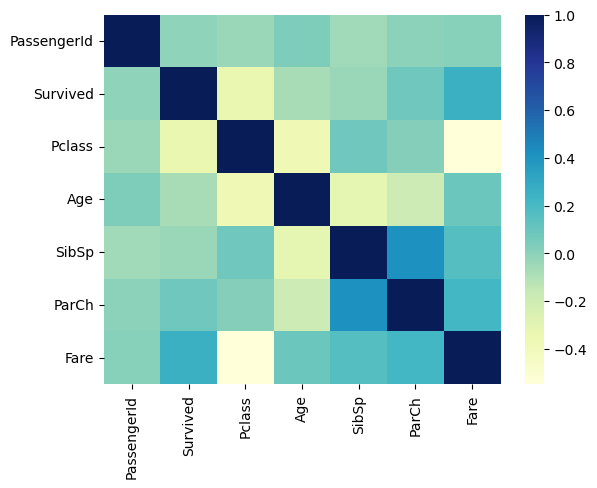

In [24]:
sns.heatmap(corr,cmap="YlGnBu")
plt.show()

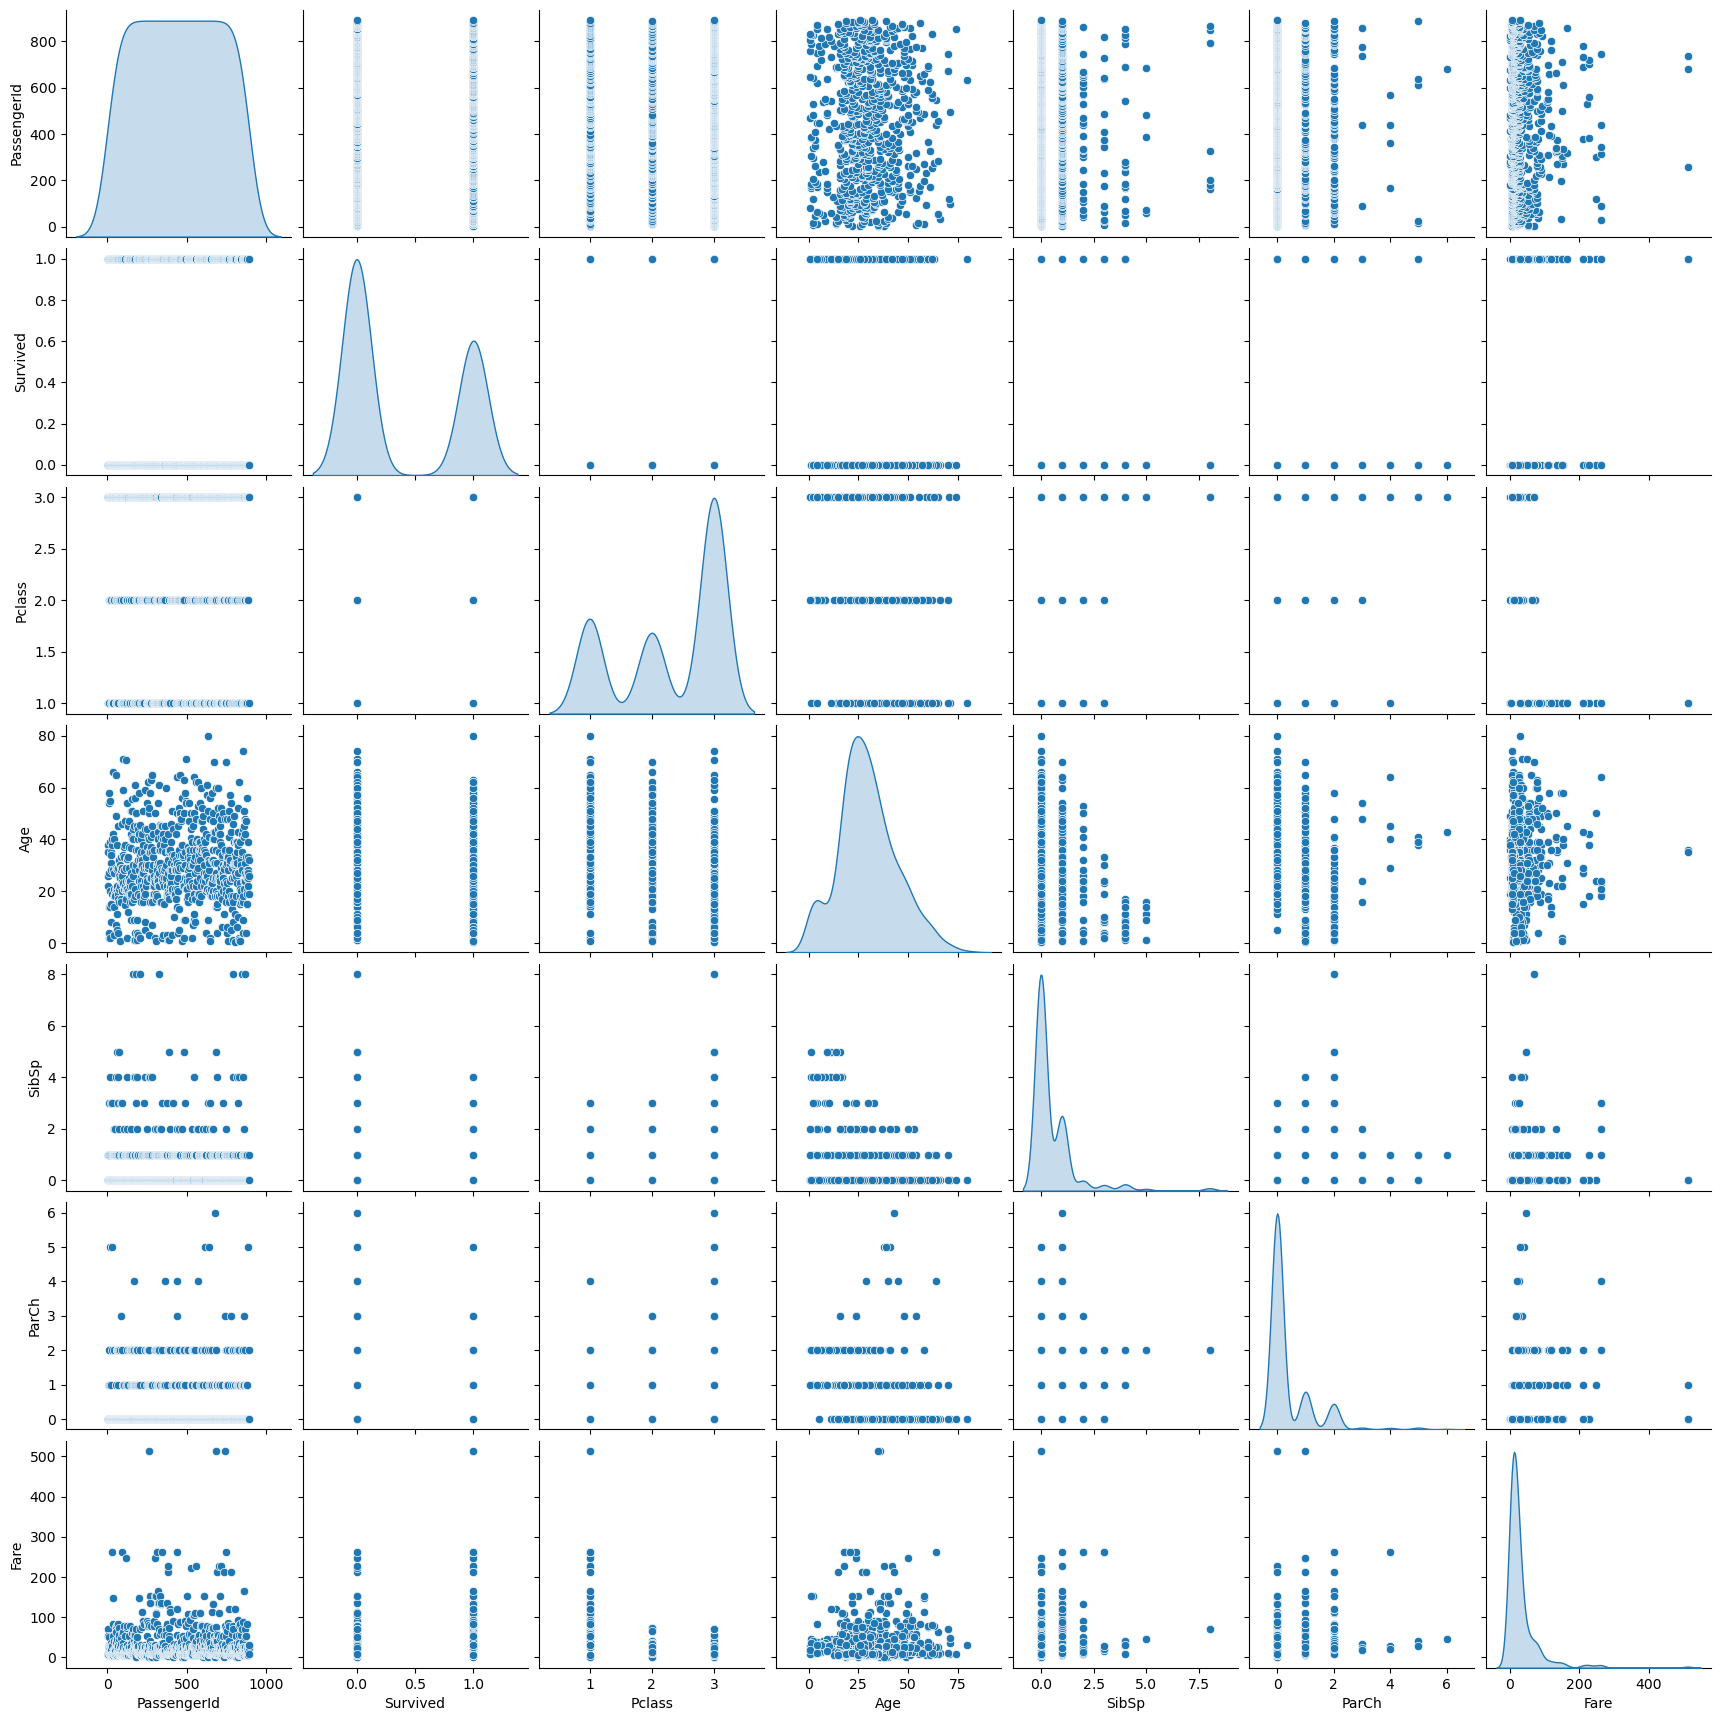

In [25]:
sns.pairplot(df,diag_kind='kde')
plt.show()

### Missing value , Encoding

In [42]:
df.drop("Cabin", axis = 1, inplace = True)


KeyError: "['Cabin'] not found in axis"

In [43]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Embarked
418,419,0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0,S
506,507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.0,S
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0,S


In [44]:
median2 = df["Age"].median()
median2
df["Age"]=df["Age"].replace(np.nan,median2)
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Embarked
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,C
605,606,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.5500,S
189,190,0,3,"Turcin, Mr. Stjepan",male,36.0,0,0,349247,7.8958,S
276,277,0,3,"Lindblom, Miss. Augusta Charlotta",female,45.0,0,0,347073,7.7500,S
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32.0,0,0,STON/O 2. 3101292,7.9250,S
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,S
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,S
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,S


In [45]:
median2

28.0

In [47]:
mean2

29.36158249158249

In [48]:
median2 = df["Age"].median()
median2
df["Age"]=df["Age"].replace(np.nan,median2)
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Embarked
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,C
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,C
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,S
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,S
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,Q
126,127,0,3,"McMahon, Mr. Martin",male,28.0,0,0,370372,7.7500,Q
404,405,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,S
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,Q
740,741,1,1,"Hawksford, Mr. Walter James",male,28.0,0,0,16988,30.0000,S
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C


In [50]:
mode2 = df["Embarked"].mode().values[0]

mode2
df["Embarked"]=df["Embarked"].replace(np.nan,mode2)
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Embarked
607,608,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5000,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
529,530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5000,S
447,448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,113794,26.5500,S
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,Q
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,S
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,C


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   ParCh        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [52]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
ParCh          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [53]:
df.drop("PassengerId", axis = 1, inplace = True)
df.sample(3)

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Embarked
31,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,C
463,0,2,"Milling, Mr. Jacob Christian",male,48.0,0,0,234360,13.0000,S
498,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,S


In [56]:
df.drop("Name", axis = 1, inplace = True)
df.sample(3)

KeyError: "['Name'] not found in axis"

In [57]:
df.drop("Ticket", axis = 1, inplace = True)
df.sample(3)

,Survived,Pclass,Sex,Age,SibSp,ParCh,Fare,Embarked
528,0,3,male,39.0,0,0,7.9250,S
335,0,3,male,28.0,0,0,7.8958,S
462,0,1,male,47.0,0,0,38.5000,S


In [58]:
df.drop("Fare", axis = 1, inplace = True)
df.sample(3)

,Survived,Pclass,Sex,Age,SibSp,ParCh,Embarked
691,1,3,female,4.0,0,1,C
600,1,2,female,24.0,2,1,S
274,1,3,female,28.0,0,0,Q


### One Hot Encoding
#### Pclass, Sex, Embarked

In [60]:
df = pd.get_dummies(df,columns=['Pclass'])
df. sample(10)

,Survived,Sex,Age,SibSp,ParCh,Embarked,Pclass_1,Pclass_2,Pclass_3
122,0,male,32.5,1,0,C,0,1,0
511,0,male,28.0,0,0,S,0,0,1
476,0,male,34.0,1,0,S,0,1,0
181,0,male,28.0,0,0,C,0,1,0
296,0,male,23.5,0,0,C,0,0,1
890,0,male,32.0,0,0,Q,0,0,1
133,1,female,29.0,1,0,S,0,1,0
61,1,female,38.0,0,0,S,1,0,0
336,0,male,29.0,1,0,S,1,0,0
850,0,male,4.0,4,2,S,0,0,1


In [61]:
df = pd.get_dummies(df,columns=['Sex'])
df. sample(10)

,Survived,Age,SibSp,ParCh,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
427,1,19.0,0,0,S,0,1,0,1,0
284,0,28.0,0,0,S,1,0,0,0,1
346,1,40.0,0,0,S,0,1,0,1,0
29,0,28.0,0,0,S,0,0,1,0,1
69,0,26.0,2,0,S,0,0,1,0,1
17,1,28.0,0,0,S,0,1,0,0,1
324,0,28.0,8,2,S,0,0,1,0,1
474,0,22.0,0,0,S,0,0,1,1,0
593,0,28.0,0,2,Q,0,0,1,1,0
611,0,28.0,0,0,S,0,0,1,0,1


In [62]:
df = pd.get_dummies(df,columns=['Embarked'])
df. sample(10)

,Survived,Age,SibSp,ParCh,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
462,0,47.00,0,0,1,0,0,0,1,0,0,1
874,1,28.00,1,0,0,1,0,1,0,1,0,0
840,0,20.00,0,0,0,0,1,0,1,0,0,1
794,0,25.00,0,0,0,0,1,0,1,0,0,1
514,0,24.00,0,0,0,0,1,0,1,0,0,1
803,1,0.42,0,1,0,0,1,0,1,1,0,0
32,1,28.00,0,0,0,0,1,1,0,0,1,0
327,1,36.00,0,0,0,1,0,1,0,0,0,1
811,0,39.00,0,0,0,0,1,0,1,0,0,1
838,1,32.00,0,0,0,0,1,0,1,0,0,1


In [67]:
x= df.drop(['Survived'], axis =1)
y = df[['Survived']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)
model_1= LogisticRegression()
model_1.fit(x_train,y_train)

LogisticRegression()

In [68]:
model_1.score(x_train,y_train)

0.8025682182985554

In [69]:
model_1.score(x_test,y_test)

0.8059701492537313